# Import modules

In [1]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
import nltk
#from gensim.models import Word2Vec 
#from gensim.models.wrappers import FastText 

#from gensim.models import FastText



from IPython.display import clear_output, display

from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
import nltk 
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
import re
from sklearn.feature_extraction import text
from builtins import input
from statistics import mean
from nltk import  pos_tag_sents


from statistics import mode, StatisticsError

import functools


import re
from sklearn.feature_extraction import text
global cases

from pandas import ExcelWriter
import xlsxwriter

import xlwt
from xlwt.Workbook import *


from nltk.corpus import wordnet

from statistics import *

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import pandas as pd
import re
from nltk import pos_tag
from nltk.tokenize.treebank import TreebankWordDetokenizer
import seaborn as sns

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pdgac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pdgac\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pdgac\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df_first_run = pd.read_excel("NYT_data_1980_to_2020_V2.xlsx")

# This is where we left off in the the NYT data output analysis

Text(0, 0.5, 'Number of Articles')

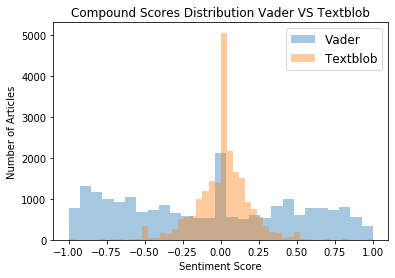

In [3]:

sns.distplot(df_first_run['compound_scores_vader'],  kde=False, label='Vader')

#df =gapminder[gapminder.continent == 'Americas']
sns.distplot(df_first_run['sentiment_scores_textblob'],  kde=False,label='Textblob')


# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Compound Scores Distribution Vader VS Textblob')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Articles')

In [83]:
df = pd.read_csv('Sentiment-Analysis-NYT-Articlesdir\\allNYTSearch1980to2020.txt', sep = "\t", encoding = 'iso-8859-1')

Getting rid off duplicate id's

In [84]:


df.drop_duplicates(subset ="response.docs._id", 
                     keep = False, inplace = True) 

In [85]:
df

,status,copyright,response.docs.abstract,response.docs.web_url,response.docs.snippet,response.docs.lead_paragraph,response.docs.print_section,response.docs.print_page,response.docs.source,response.docs.pub_date,...,response.docs.headline.print_headline,response.docs.headline.name,response.docs.headline.seo,response.docs.headline.sub,response.docs.byline.original,response.docs.byline.organization,response.meta.hits,response.meta.offset,response.meta.time,response.docs.subsection_name
1,OK,Copyright (c) 2020 The New York Times Company....,Federal officials said today that the Govern...,https://www.nytimes.com/1981/01/03/us/us-may-a...,NaN,Federal officials said today that the Governme...,1,10,The New York Times,1981-01-03T05:00:00+0000,...,U.S. MAY APPEAL RULING FORBIDDING INDEFINITE D...,NaN,NaN,NaN,"By Robert Pear, Special To the New York Times",NaN,986,0.0,244.0,NaN
2,OK,Copyright (c) 2020 The New York Times Company....,By Michael Wright and Caroline Rand Herron U...,https://www.nytimes.com/1981/01/04/weekinrevie...,NaN,By Michael Wright and Caroline Rand Herron Unt...,4,2,The New York Times,1981-01-04T05:00:00+0000,...,THE NATION; Demand for Action On Jailed Refugee,NaN,NaN,NaN,NaN,NaN,986,0.0,244.0,NaN
3,OK,Copyright (c) 2020 The New York Times Company....,With ''descents'' rising and ''ascents'' dec...,https://www.nytimes.com/1981/01/04/weekinrevie...,NaN,With ''descents'' rising and ''ascents'' decli...,4,4,The New York Times,1981-01-04T05:00:00+0000,...,ISRAELI EMIGRATION INSPIRES ANGER AND FEAR,NaN,NaN,NaN,By Henry Kamm,NaN,986,0.0,244.0,NaN
4,OK,Copyright (c) 2020 The New York Times Company....,Bruce Feirstein is a writer living in New Yo...,https://www.nytimes.com/1981/01/04/magazine/th...,NaN,Bruce Feirstein is a writer living in New York...,6,26,The New York Times,1981-01-04T05:00:00+0000,...,THE OLD STARGAZER'S ALMANAC FOR 1981,NaN,NaN,NaN,NaN,NaN,986,0.0,244.0,NaN
5,OK,Copyright (c) 2020 The New York Times Company....,The General Accounting Office says there app...,https://www.nytimes.com/1981/01/04/us/bogus-so...,NaN,The General Accounting Office says there appea...,1,20,The New York Times,1981-01-04T05:00:00+0000,...,BOGUS SOCIAL SECURITY CARDS FOUND INCREASING B...,NaN,NaN,NaN,"By Robert Pear, Special To the New York Times",NaN,986,0.0,244.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21541,OK,Copyright (c) 2020 The New York Times Company....,He vetoed a bill to let federal judges preside...,https://www.nytimes.com/2019/12/24/nyregion/cu...,He vetoed a bill to let federal judges preside...,ALBANY  Gov. Andrew M. Cuomos feud with Pres...,A,20,The New York Times,2019-12-24T20:03:44+0000,...,Cuomo Blocks Trump-Picked Judges From Officiat...,NaN,NaN,NaN,By Jesse McKinley,NaN,671,660.0,52.0,NaN
21542,OK,Copyright (c) 2020 The New York Times Company....,"In his traditional holiday benediction, Franci...",https://www.nytimes.com/2019/12/25/world/europ...,"In his traditional holiday benediction, Franci...",ROME  As Christians around the world celebrat...,A,6,The New York Times,2019-12-25T13:34:43+0000,...,"Pope Francis, in Christmas Speech, Urges Natio...",NaN,NaN,NaN,By Anna Momigliano and Elisabetta Povoledo,NaN,671,660.0,52.0,Europe
21543,OK,Copyright (c) 2020 The New York Times Company....,Hassan Fazilis autobiographical documentary p...,https://www.nytimes.com/2019/12/30/arts/televi...,Hassan Fazilis autobiographical documentary p...,POV: MIDNIGHT TRAVELER 10 p.m. on PBS (check l...,C,7,The New York Times,2019-12-30T06:00:09+0000,...,Whats On Monday,NaN,NaN,NaN,By Julia Carmel,NaN,671,660.0,52.0,Television
21544,OK,Copyright (c) 2020 The New York Times Company....,Kenneth T. Cuccinelli II said the suspect in t...,https://www.nytimes.com/2019/12/30/us/politics...,Kenneth T. Cuccinelli II said the suspect in t...,"Kenneth T. Cuccinelli II, a top immigration of...",A,16,The New York Times,2019-12-30T22:03:49+0000,...,"Immigration Official Tweets, and Deletes, Alle

Preprocess with lowercasing words, we already extracted what we needed to know about the high frequency words

In [86]:
def preprocess_regex(row):
    row=str(row)
    row = row.lower() #This is the only differences between the first preprocess regex and from the previous notebook
    row=row.replace('-'," ") 
    row=row.replace(','," ")
    row=row.replace('.'," ")
    row=row.replace('+'," ")
    row=row.replace('"'," ")
    row=row.replace("''","")
    row=row.replace("'","")
    row=row.replace(":","")
    row=row.replace("_","")
    row = row.replace("/","")
    cleanr = re.compile('<.*?>')  #this would replace 'random' in 'random words' but not in 'pseudorandom words'
    cleantext = re.sub(cleanr, '', row)
    line = re.sub('[!@#$]', '', cleantext)
    rem_num = re.sub('[0-9]+', '', line)
    #tokenizer = RegexpTokenizer(r'\w+')  #this yields lower counts of words
    tokens = nltk.tokenize.word_tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')] #if it appears more than two times get rid off the stopwords, change this
    return " ".join(filtered_words)


In [87]:
df['cleanText']=df['response.docs.lead_paragraph'].map(lambda s:preprocess_regex(s)) 

Tokenized_lead_paragraphs = df.apply(lambda row: nltk.word_tokenize(row['cleanText']), axis=1)

# Retraining Senitment analysis with vader

How to add words to dicctionary

https://stackoverflow.com/questions/40481348/is-it-possible-to-edit-nltks-vader-sentiment-lexicon

----------------------------------------------------------------------------------------------------------------------


Where is the lexicon based dicctionary?

https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt

- Why do we replace "n_gram _removal"? Because we don't want to affect the removal of a word to the overall sentiment score. 

In [88]:
n_gram_stopwords = ["united states", "supreme court", "homeland security", 
                   "social security", "justice department", "great depression",
                  "united nations", "statue of liberty", "central intelligence", "lower east", 
                  "star wars", "new york", "department of defense"]

In [89]:
df['removed_n_gram_clean_text']=df['cleanText'].str.replace("|".join(n_gram_stopwords), "n_gram _removal", regex = True)

In [90]:
df['removed_n_gram_clean_text'].apply(word_tokenize).apply(TreebankWordDetokenizer().detokenize)

1        federal officials said today government would ...
2        michael wright caroline rand herron last week ...
3        descents rising ascents declining record level...
4        bruce feirstein writer living n_gram _removal ...
5        general accounting office says appears growing...
                               ...                        
21541    albany gov andrew cuomos feud president trump...
21542    rome christians around world celebrated christ...
21543    pov midnight traveler pbs check local listings...
21544    kenneth cuccinelli top immigration official tr...
21545    population growth n_gram _removal crept along ...
Name: removed_n_gram_clean_text, Length: 21457, dtype: object

In [91]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()



Declaring words for retraining

In [92]:
list_words_positve_to_neutral = ['like', 'number', 'party', 'want', 
                                'thank', 'parties', 'significant', 'sure', 'playing', 'gain',
                                 'plays', 'yes',  ] #'security'
list_words_negative_to_neutral = ['low', 'drop', 'lower']


In [93]:
list_words_postive_to_negative = ['escape' ,'challenge', 'challenges','overwhelmed', 'urgent', 'challenging']


In [94]:
list_words_neutral_to_positve = ['home', 'naturalization']

list_words_neutral_to_negative = ['aliens', 'deportation','alien', 
                                  'camps', 'seeking', 'undocumented', 'aid', 
                                  'officers', 'troops', 'illegally', 'enforcement', 'fled' ]

Convert to neutral and adding vlaues

In [95]:
value_neutral=0.0

new_positve_to_neutral= dict.fromkeys(list_words_positve_to_neutral, value_neutral)

new_negative_to_neutral = dict.fromkeys(list_words_negative_to_neutral, value_neutral)


Conver to posiitve and adding values

In [96]:
positive_value = 1.5

new_neutral_to_positive = dict.fromkeys(list_words_neutral_to_positve , positive_value)

Conver to negative and adding values

In [97]:
negative_value = -1.5

new_posiitve_to_negative= dict.fromkeys(list_words_postive_to_negative, negative_value)

new_neutral_to_negative = dict.fromkeys(list_words_neutral_to_negative, negative_value)

In [98]:
new_neutral_to_negative

{'aliens': -1.5,
 'deportation': -1.5,
 'alien': -1.5,
 'camps': -1.5,
 'seeking': -1.5,
 'undocumented': -1.5,
 'aid': -1.5,
 'officers': -1.5,
 'troops': -1.5,
 'illegally': -1.5,
 'enforcement': -1.5,
 'fled': -1.5}

Update dicctionary with new values

In [99]:
SIA.lexicon.update(new_positve_to_neutral)

In [100]:
SIA.lexicon.update(new_negative_to_neutral)

In [101]:
SIA.lexicon.update(new_neutral_to_positive )

In [102]:
SIA.lexicon.update(new_posiitve_to_negative)
SIA.lexicon.update(new_neutral_to_negative)

# checker for words after retraining them

In [103]:
for key, value in SIA.lexicon.items() :
    if key == 'trump':
        
        print (key, value)

# Sentiment Analysis with  Retrained Vader

In [104]:
def sentiment_analyzer_scores(sentence):
    scores = SIA.polarity_scores(sentence)
    return scores

In [105]:
clean_text=list(df['removed_n_gram_clean_text'])

sentiment_scores = []
for i in range(len(clean_text)):
    sentiment_scores.append(sentiment_analyzer_scores(clean_text[i]))

In [106]:
df['sentiment_scores_vader'] = sentiment_scores

In [107]:
compound_scores = []
for i in range(len(sentiment_scores)):
    compound_scores.append(sentiment_scores[i]['compound'])
    
neg_scores = []
for i in range(len(sentiment_scores)):
    neg_scores.append(sentiment_scores[i]['neg'])

pos_scores = []
for i in range(len(sentiment_scores)):
    pos_scores.append(sentiment_scores[i]['pos'])


In [108]:
df['compound_scores_vader'] = compound_scores

df['negative_scores_vader'] = neg_scores

df['positive_scores_vader'] = pos_scores

In [109]:
#df.hist(column = 'compound_scores_vader')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C7C982E08>]],
      dtype=object)

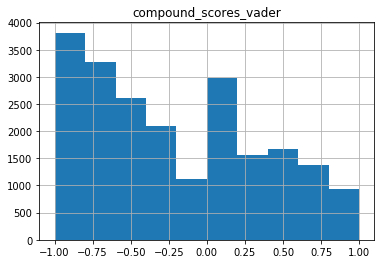

In [110]:
 df.hist(column = 'compound_scores_vader')

# How do the retrain of scores look before and after?

- Becasue we manipulated certain words, we see a slight shift from positive to negative

Text(0, 0.5, 'Number of Articles')

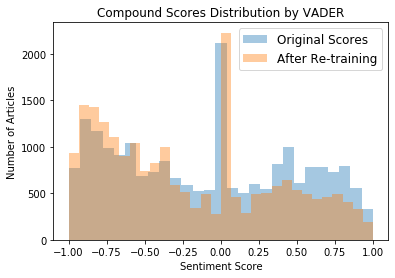

In [111]:

sns.distplot(df_first_run['compound_scores_vader'],  kde=False, label='Original Scores')

#df =gapminder[gapminder.continent == 'Americas']
sns.distplot(df['compound_scores_vader'],  kde=False,label='After Re-training')


# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Compound Scores Distribution by VADER')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Articles')

# Look at individual retrained words in the sphere of Positive, Negative and Neutral

In [112]:
#nltk.download('punkt')
#nltk.download('vader_lexicon')

In [113]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer


def get_word_sentiment(text):
    neg_word_list = []
    pos_word_list = []
    neu_word_list = []
    
    tokenized_text = nltk.word_tokenize(text)
    
    for word in tokenized_text:
        if (SIA.polarity_scores(word)['compound']) >= 0.05:
            pos_word_list.append(word)
        elif (SIA.polarity_scores(word)['compound']) <= -0.05:
            neg_word_list.append(word)
        else:
            neu_word_list.append(word)
    return {'Positive':pos_word_list,'Neutral': neu_word_list,'Negative':neg_word_list}
    #return pos_word_list,neu_word_list,neg_word_list


In [114]:
lists_sentiment_P_N_N = []
for i in range(len(df)):
    lists_sentiment_P_N_N.append(get_word_sentiment(clean_text[i]))

In [115]:
len(lists_sentiment_P_N_N)

21457

In [116]:
#lists_sentiment_P_N_N[0]

Neutral words extraction by lexicion vader

In [117]:
List_of_neutral_words_in_corpus = []
for d in lists_sentiment_P_N_N:
    List_of_neutral_words_in_corpus.append(d['Neutral'])
    
List_of_neutral_words_in_corpus

flat_list_neutral_words = [item for sublist in List_of_neutral_words_in_corpus for item in sublist]


word_dist = nltk.FreqDist(flat_list_neutral_words)
top_N = len(word_dist)

    #creating a dataframe of these words plus id so later we can merge.
df_neutral_words= pd.DataFrame(word_dist.most_common(top_N),  #C_UW_F = category unique word final
                    columns=['Word', 'Frequency'])




In [118]:
len(df_neutral_words)

45630

In [119]:
#df_neutral_words

Positve words extraction by lexicion vader

In [120]:

List_of_positive_words_in_corpus = []
for y in lists_sentiment_P_N_N:
    List_of_positive_words_in_corpus.append(y['Positive'])

flat_list_positive_words = [item for sublist in List_of_positive_words_in_corpus for item in sublist]


word_dist = nltk.FreqDist(flat_list_positive_words)
top_N = len(word_dist)

    #creating a dataframe of these words plus id so later we can merge.
df_positive_words= pd.DataFrame(word_dist.most_common(top_N),  #C_UW_F = category unique word final
                    columns=['Word', 'Frequency'])

In [121]:
#df_positive_words

In [122]:
len(df_positive_words)

1336

In [123]:
List_of_negative_words_in_corpus = []
for y in lists_sentiment_P_N_N:
    List_of_negative_words_in_corpus.append(y['Negative'])

flat_list_negative_words = [item for sublist in List_of_negative_words_in_corpus for item in sublist]


word_dist = nltk.FreqDist(flat_list_negative_words)
top_N = len(word_dist)

    #creating a dataframe of these words plus id so later we can merge.
df_negative_words= pd.DataFrame(word_dist.most_common(top_N),  #C_UW_F = category unique word final
                    columns=['Word', 'Frequency'])

In [124]:
len(df_negative_words)

1765

Adding a POS tag to the words in Neutral/ postive and negative words in vader

In [125]:
# s_positive = df_positive_words['Word']
# tagged_sent_pos = pos_tag(s_positive)  # or pos_tag(s.tolist())
# tags_pos =  [ e[1] for e in tagged_sent_pos ]
# df_positive_words['TAGS'] = tags_pos

In [126]:
# s_neutral = df_neutral_words['Word']
# tagged_sent_neutral = pos_tag(s_neutral)  # or pos_tag(s.tolist())
# tags_neutral =  [ e[1] for e in tagged_sent_neutral ]
# df_neutral_words['TAGS'] = tags_neutral

In [127]:
# s_negative = df_negative_words['Word']
# tagged_sent_negative = pos_tag(s_negative)  # or pos_tag(s.tolist())
# tags_neg =  [ e[1] for e in tagged_sent_negative ]
# df_negative_words['TAGS'] = tags_neg

is at least one letter capitalized?

In [128]:
# def at_least_one_char_upper(_list_of_words):
#     at_least_one_upper = []
#     for i in range(len(_list_of_words)):
#         at_least_one_upper.append(any(l.isupper() for l in _list_of_words[i]))
#     return at_least_one_upper
    


# df_neutral_words['Is a character in word capitalized?'] = at_least_one_char_upper(s_neutral)
# df_positive_words['Is a character in word capitalized?'] = at_least_one_char_upper(s_positive)
# df_negative_words['Is a character in word capitalized?'] = at_least_one_char_upper(s_negative)



In [322]:
with pd.ExcelWriter('NYT_data_1980_to_2020_Retrained.xlsx') as writer:
    df.to_excel(writer, sheet_name = 'nyt_data', header = True )
    df_positive_words.to_excel(writer, sheet_name='positive_words_by_vader_RT', header = True)
    df_negative_words.to_excel(writer, sheet_name='negative_words_by_vader_RT', header = True)
    df_neutral_words.to_excel(writer, sheet_name= 'neutral_words_by_vader_RT', header = True)

# Analysis of latino immigtation in USA corpus

Which articles pertain to the United States?

In [129]:
df['response.docs.section_name'].unique() #'Week in Review', 'Magazine' 'Business Day' "Education" "job market" "news" "blogs", "times topic", "upshot", "times insider", 'Neediest Cases', 'The Weekly'

array(['U.S.', 'Week in Review', 'Magazine', 'New York', 'World', 'Books',
       'Home & Garden', 'Business Day', 'Arts', 'Archives', 'Style',
       'Movies', 'Travel', 'Sports', 'Theater', 'Science', 'Real Estate',
       'Education', 'Job Market', '405', 'Health', '895', '4114', '2186',
       '1628', '215', '4706', '273', 'T Magazine', '401', '2197', '1866',
       '1147', '1234', '3306', '979', '545', '516', '460', '1356', 'News',
       '295', '1359', '294', 'Automobiles', 'Food', 'Technology',
       'Giving', 'Opinion', 'Obituaries', 'Your Money', nan,
       'Fashion & Style', 'Washington', 'The Learning Network', 'Blogs',
       'nyt://article/cd9e29c6-26cc-52e8-b3a2-ff6bdacceac2',
       'Corrections', 'Times Topics', 'Multimedia/Photos', 'UrbanEye',
       'Great Homes & Destinations', 'Crosswords & Games', 'The Upshot',
       'Times Insider', 'Podcasts', 'Climate', 'Reader Center', 'Lens',
       'Well', 'Neediest Cases', 'The Weekly', 'Video'], dtype=object)

In [130]:
#querys (United states, states, largest cities, )

In [292]:
df['cleanText_lower']=df['cleanText'].str.lower()

In [293]:
df_US=df[(df['response.docs.section_name'] =="U.S.") | 
         (df['response.docs.section_name'] == 'New York') | 
         (df['response.docs.section_name'] == 'Washington') |
        (df['response.docs.section_name'] == 'Week in Review')  |
        (df['response.docs.section_name'] == 'Magazine')  |
         (df['response.docs.section_name'] == 'Business Day')  |
         (df['response.docs.section_name'] == 'Education')  |
         (df['response.docs.section_name'] == 'Job Market')  |
          (df['response.docs.section_name'] == 'News')  |
          (df['response.docs.section_name'] == 'Blogs')  |
           (df['response.docs.section_name'] == 'Job Market')  |
          (df['response.docs.section_name'] == 'The Upshot')  |
          (df['response.docs.section_name'] == 'Times Insider')  |
          (df['response.docs.section_name'] == 'Neediest Cases')  |
          (df['response.docs.section_name'] == 'The Weekly') ]
         

In [318]:
amount = ("Amount of articles that refer to Immigration in the Scope of the US", len(df_US))

In [317]:
prct =("Percentage of articles that refer to Immigration in the Scope of the US", len(df_US)/ len(df))

In [319]:
stats =pd.DataFrame({"Amount": amount, "percentage" : prct  })

graphing representing immigration in the United States

Text(0, 0.5, 'Number of Articles')

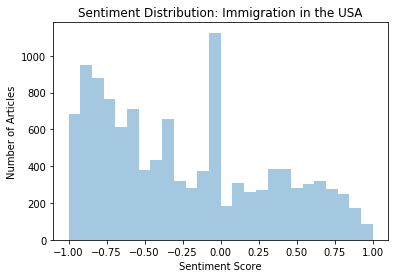

In [279]:
#df =gapminder[gapminder.continent == 'Americas']
sns.distplot(df_US['compound_scores_vader'],  kde=False)


# Plot formatting
#plt.legend(prop={'size': 12})
plt.title('Sentiment Distribution: Immigration in the USA')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Articles')




In [295]:
df_US['response.docs.pub_date']=df_US['response.docs.pub_date'].str[:10]

#df_US['response.docs.pub_date'] = df_US[df_US['response.docs.pub_date'] != 'article'] 
#df_US['response.docs.pub_date'] = df_US[df_US['response.docs.pub_date'] != 'OK'] 



C:\Users\pdgac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [305]:
df_US_noarticle=df_US[df_US['response.docs.pub_date'] != 'article'] 
df_US_no_OK = df_US_noarticle[df_US_noarticle['response.docs.pub_date'] != 'article'] 

df_US_no_OK['response.docs.pub_date'] = pd.to_datetime(df_US_no_OK['response.docs.pub_date'])


In [309]:
df_US_no_OK['year']=df_US_no_OK['response.docs.pub_date'].dt.year

df_US_no_OK['month'] = df_US_no_OK['response.docs.pub_date'].dt.month

In [310]:
df_US_no_OK= df_US_no_OK.set_index(df_US_no_OK['response.docs.pub_date'])

In [311]:
df_US_no_OK['normalized_compound'] = [(float(i)-min(df_US_no_OK['compound_scores_vader']))/(max(df_US_no_OK['compound_scores_vader'])-min(df_US_no_OK['compound_scores_vader'])) for i in df_US_no_OK['compound_scores_vader']]

In [312]:
mean_month_all_us = df_US_no_OK['normalized_compound'].resample('1 m').mean()

In [313]:
mean_year_all_us = df_US_no_OK['normalized_compound'].resample('1 y').mean()

In [338]:
year_counts_articles_us=df_US_no_OK['year'].value_counts(sort = True)

month_counts_articles_us=df_US_no_OK['month'].value_counts(sort = True)

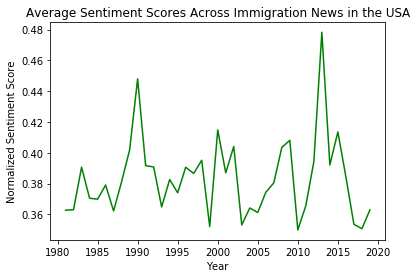

In [343]:
# Plot mean python/rstats by day
plt.plot(mean_year_all_us.index.year, mean_year_all_us, color = 'green')

plt.xlabel('Year')
plt.ylabel('Normalized Sentiment Score')
plt.title('Average Sentiment Scores Across Immigration News in the USA')
plt.show()

In [340]:
with pd.ExcelWriter('USNewsArticles.xlsx') as writer:
    df_US_no_OK.to_excel(writer, sheet_name = 'US_Articles', header = True )
    mean_month_all_us.to_excel(writer, sheet_name='Mean_Month_Scores', header = True)
    mean_year_all_us.to_excel(writer, sheet_name='Mean_Year_Scores', header = True)
    month_counts_articles_us.to_excel(writer, sheet_name='Monthly_Article_count', header = True)
    year_counts_articles_us.to_excel(writer, sheet_name='yearly_Article_count', header = True)
    stats.to_excel(writer, sheet_name='stats', header = True)

# Latino Immigration in scope on USA 

In [215]:
df_US_Latino=df_US[df_US['cleanText_lower'].str.contains
   ((r'(?:\s|^|Ei:|EI:|EI-)'+'latino|latinos|latina|latinas|latinx|hispanic|hispanics|south americans|south america|mexican|mexicans|central american|central americans|salvadoran|salvadorans|honduran|hondurans|guatemalan|guatemalans|costa rican|costa ricans|panamanian|nicaraguan|colombian|colombians|venezuelan|venezuelans|ecuadorian|ecuadorians|bolivian|bolivains|brazilian|brazilians|paraguayan|parayuayans|uruguayan|uruguayans|argentine|argentines|chilean|chileans|nicaraguans|nicaraguan|cuban|cubans|dominican|dominicans|puerto ricans|haitian|haitians|mexico|honduras|el salvador|guatemala|costa rica|panama|nicaragua|ecuador|brazil|paraguay|haiti|venezuela|belize|cuba|puerto rico|domenican republic'
     +r'(?:\s|$)'), case=False)]

In [216]:
print("Amount of articles that refer to Latino Immigration in the Scope of the US", len(df_US_Latino), "out of", len(df_US))

Amount of articles that refer to Latino Immigration in the Scope of the US 2299 out of 11659


In [217]:
print("percent of latino mentioned articles in the USA articles:", len(df_US_Latino)/ len(df_US) *100,"%")

percent of latino mentioned articles in the USA articles: 19.718672270349085 %


In [326]:
Amount_l =("Amount of articles that refer to Latino Immigration in the Scope of the US", len(df_US_Latino))

prct_l = ("percent of latino mentioned articles in the USA articles:", len(df_US_Latino)/ len(df_US) *100)

In [328]:
stats_latino =pd.DataFrame({"Amount": Amount_l, "percentage" : prct_l })

# Graph sentiment in latino immigration spherefor articles in the US

No handles with labels found to put in legend.


Text(0, 0.5, 'Number of Articles')

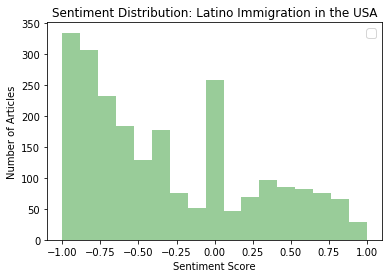

In [218]:
sns.distplot(df_US_Latino['compound_scores_vader'],  kde=False, color = 'green')


# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Sentiment Distribution: Latino Immigration in the USA')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Articles')

In [139]:
#df[df['cleanText_lower'].str.contains("latino|latina|latinx|hispanic|mexican|mexicans|central american|salvadoran|honduran|guatemalan|costa rican|panamanian|nicaraguan|colombian|venezuelan|ecuadorian|bolivian|brazilian|paraguayan|uruguayan|argentine|chilean|cuban|dominican|mexico|cuba|honduras|el salvador|mexicos", na=False)]

# Latino immigration in scope of ALL articles

In [219]:
df_all_Latino=df[df['cleanText_lower'].str.contains
   ((r'(?:\s|^|Ei:|EI:|EI-)'+'latino|latinos|latina|latinas|latinx|hispanic|hispanics|south americans|south america|mexican|mexicans|central american|central americans|salvadoran|salvadorans|honduran|hondurans|guatemalan|guatemalans|costa rican|costa ricans|panamanian|nicaraguan|colombian|colombians|venezuelan|venezuelans|ecuadorian|ecuadorians|bolivian|bolivains|brazilian|brazilians|paraguayan|parayuayans|uruguayan|uruguayans|argentine|argentines|chilean|chileans|nicaraguans|nicaraguan|cuban|cubans|dominican|dominicans|puerto ricans|haitian|haitians|mexico|honduras|el salvador|guatemala|costa rica|panama|nicaragua|ecuador|brazil|paraguay|haiti|venezuela|belize|cuba|puerto rico|domenican republic'
     +r'(?:\s|$)'), case=False)]

In [220]:
print("Latino immigration articles out of ALL articles", len(df_all_Latino),"out of", len(df))

Latino immigration articles out of ALL articles 3328 out of 21457


In [221]:
print(" Percent Latino immigration articles out of ALL articles:", len(df_all_Latino)/ len(df)*100, "%")

 Percent Latino immigration articles out of ALL articles: 15.510089947336533 %


# Graphing sentiment distribution for Latino Sphere on ALL articles

Text(0, 0.5, 'Number of Articles')

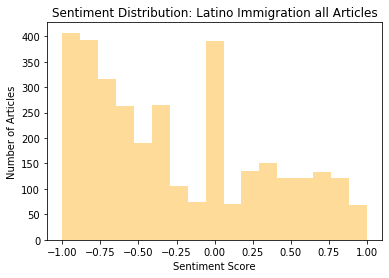

In [341]:
#df =gapminder[gapminder.continent == 'Americas']
sns.distplot(df_all_Latino['compound_scores_vader'],  kde=False, color = 'orange')


# Plot formatting
#plt.legend(prop={'size': 12})
plt.title('Sentiment Distribution: Latino Immigration all Articles')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Articles')

# WHY do the two differ?

In [222]:
merge_latino_df=pd.merge(df_all_Latino,df_US_Latino, on = 'response.docs._id', how='outer', indicator=True)



print(merge_latino_df['_merge'].value_counts())

latino_differnces=merge_latino_df[merge_latino_df['_merge'] == "left_only"]

both          2299
left_only     1029
right_only       0
Name: _merge, dtype: int64


In [223]:
latino_differnces['response.docs.section_name_x'].value_counts()

World                   706
Travel                   68
Opinion                  53
Arts                     52
Sports                   28
Books                    22
Style                    15
Real Estate              10
Science                  10
Movies                    8
Multimedia/Photos         7
T Magazine                6
Health                    6
Home & Garden             6
Food                      6
Technology                5
Theater                   5
Archives                  4
The Learning Network      3
Automobiles               2
Fashion & Style           2
Reader Center             1
Lens                      1
Climate                   1
Giving                    1
Video                     1
Name: response.docs.section_name_x, dtype: int64

# Time Series Analysis 

In [224]:
df_all_Latino['response.docs.pub_date']=df_all_Latino['response.docs.pub_date'].str[:10]

df_all_Latino['response.docs.pub_date'] = pd.to_datetime(df_all_Latino['response.docs.pub_date'])

C:\Users\pdgac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\pdgac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [225]:
from datetime import date

#Amount of articles that get covered 

# get counts of montly artiles throughout the years, sentiment step 2

In [226]:
df_all_Latino['year']=df_all_Latino['response.docs.pub_date'].dt.year

df_all_Latino['month'] = df_all_Latino['response.docs.pub_date'].dt.month

C:\Users\pdgac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [228]:
df_all_Latino['month'].value_counts()

7     349
8     314
5     312
6     299
10    273
1     269
9     260
12    254
2     253
3     251
11    249
4     245
Name: month, dtype: int64

In [229]:
df_all_Latino['year'].value_counts()

1981    199
2006    183
1994    158
2019    127
2018    122
1982    118
2004    112
1986    105
2007    102
2001     96
2010     95
1997     95
2014     94
1985     91
2015     87
2012     87
2002     82
2013     77
1984     75
1993     74
2008     74
2003     72
2000     72
1987     69
1992     68
1983     67
2005     67
1989     66
2009     66
1999     66
2016     59
1998     56
2017     56
1995     56
1991     53
2011     51
1990     45
1996     44
1988     42
Name: year, dtype: int64

# Average Sentiment Score by year normalization of vader ALL latino News

How did I normalize it: https://stackoverflow.com/questions/26785354/normalizing-a-list-of-numbers-in-python

Since we want to take the mean of sentiment scores we have to normalize the values of range -1 to 1 to 0-100 (in percent)

In [230]:
df_all_Latino['normalized_compound'] = [(float(i)-min(df_all_Latino['compound_scores_vader']))/(max(df_all_Latino['compound_scores_vader'])-min(df_all_Latino['compound_scores_vader'])) for i in df_all_Latino['compound_scores_vader']]

C:\Users\pdgac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [231]:
df_all_Latino['normalized_compound']

1        0.149745
2        0.261578
14       0.329949
18       0.786036
22       0.013104
           ...   
21514    0.244623
21516    0.072122
21524    0.164649
21525    0.132340
21540    0.039812
Name: normalized_compound, Length: 3328, dtype: float64

In [232]:
df_all_Latino = df_all_Latino .set_index(df_all_Latino['response.docs.pub_date'])

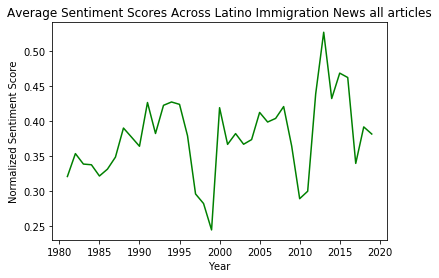

In [342]:
mean_years= df_all_Latino['normalized_compound'].resample('1 y').mean()


# Plot mean python/rstats by day
plt.plot(mean_years.index.year, mean_years, color = 'green')

plt.xlabel('Year')
plt.ylabel('Normalized Sentiment Score')
plt.title('Average Sentiment Scores Across Latino Immigration News all articles')
plt.show()

# Average Sentiment Score Normalized US Latino news

In [234]:
df_US_Latino['normalized_compound'] = [(float(i)-min(df_US_Latino['compound_scores_vader']))/(max(df_US_Latino['compound_scores_vader'])-min(df_US_Latino['compound_scores_vader'])) for i in df_US_Latino['compound_scores_vader']]

C:\Users\pdgac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [235]:
df_US_Latino['response.docs.pub_date'] = df_US_Latino['response.docs.pub_date'].str[:10]


C:\Users\pdgac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [236]:
df_US_Latino['response.docs.pub_date'] = pd.to_datetime(df_US_Latino['response.docs.pub_date'])

C:\Users\pdgac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [237]:
df_US_Latino['year'] = df_US_Latino['response.docs.pub_date'].dt.year

C:\Users\pdgac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [238]:
df_US_Latino['month'] = df_US_Latino['response.docs.pub_date'].dt.month

C:\Users\pdgac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [239]:
df_US_Latino= df_US_Latino.set_index(df_US_Latino['response.docs.pub_date'])

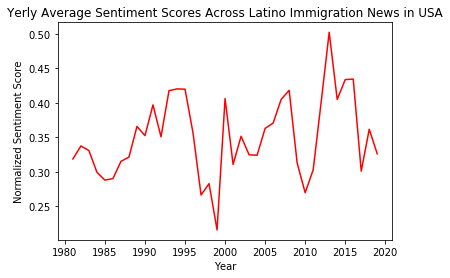

In [240]:
mean_years_us_latino= df_US_Latino['normalized_compound'].resample('1 y').mean()


# Plot mean python/rstats by day
plt.plot(mean_years_us_latino.index.year, mean_years_us_latino, color = 'red')

plt.xlabel('Year')
plt.ylabel('Normalized Sentiment Score')
plt.title('Yerly Average Sentiment Scores Across Latino Immigration News in USA')
plt.show()

In [252]:
mean_month_us_latino = df_US_Latino['normalized_compound'].resample('1 m').mean()

In [255]:
mean_month_us_latino

response.docs.pub_date
1981-01-31    0.450585
1981-02-28    0.311479
1981-03-31    0.183751
1981-04-30    0.369867
1981-05-31    0.265685
                ...   
2019-08-31    0.213653
2019-09-30    0.397977
2019-10-31    0.448209
2019-11-30    0.139258
2019-12-31    0.039812
Freq: M, Name: normalized_compound, Length: 468, dtype: float64

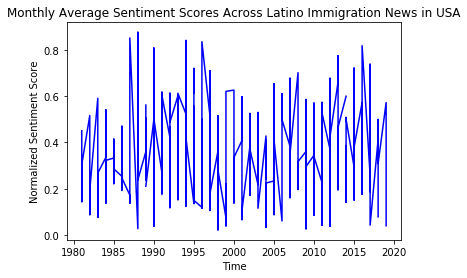

In [254]:
plt.plot(mean_month_us_latino.index.year, mean_month_us_latino, color = 'blue')

plt.xlabel('Time')
plt.ylabel('Normalized Sentiment Score')
plt.title('Monthly Average Sentiment Scores Across Latino Immigration News in USA')
plt.show()

In [241]:
months =  ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

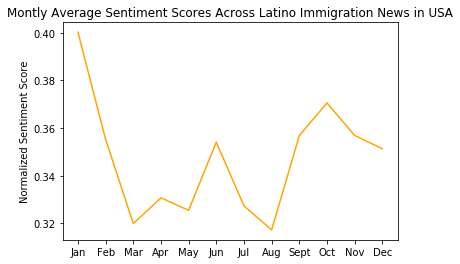

In [242]:
#mean_month_us_latino= df_US_Latino['normalized_compound'].resample('M').mean()

mean_month_us_latino=df_US_Latino['normalized_compound'].groupby(df_US_Latino['normalized_compound'].index.month).mean()

# Plot mean python/rstats by day
plt.plot(months, mean_month_us_latino, color = 'orange')
plt.ylabel('Normalized Sentiment Score')
plt.title('Montly Average Sentiment Scores Across Latino Immigration News in USA')
plt.show()

In [246]:
df_US_Latino['normalized_compound'].groupby(df_US_Latino['normalized_compound'].index.month).mean()

response.docs.pub_date
1     0.400215
2     0.355241
3     0.319949
4     0.330687
5     0.325489
6     0.354099
7     0.327370
8     0.317259
9     0.356855
10    0.370550
11    0.356908
12    0.351318
Name: normalized_compound, dtype: float64

In [332]:
month_count_articles_latino=df_US_Latino['month'].value_counts(sort = True)

In [333]:
year_counts_articles_latino=df_US_Latino['year'].value_counts(sort = True)

In [335]:
with pd.ExcelWriter('US_Latino_News_Articles.xlsx') as writer:
    df_US_Latino.to_excel(writer, sheet_name = 'Latino_US_Articles', header = True )
    mean_month_us_latino.to_excel(writer, sheet_name='Mean_Month_Scores', header = True)
    mean_years_us_latino.to_excel(writer, sheet_name='Mean_Year_Scores', header = True)
    month_count_articles_latino.to_excel(writer, sheet_name='Monthly_Article_count', header = True)
    year_counts_articles_latino.to_excel(writer, sheet_name='yearly_Article_count', header = True)
    stats_latino.to_excel(writer, sheet_name='stats', header = True)

In [ ]:
#to check if above is working properly

# try1=df_US_Latino[df_US_Latino['month'] == 3]
# try1['normalized_compound'].mean()

saving data that is cleaned and its removed of duplicates as well as adding words that are positive, negative and neutral by the lexicon vader

In [329]:
# with pd.ExcelWriter('NYT_data_1980_to_2020_Retrained.xlsx') as writer:
#     df.to_excel(writer, sheet_name = 'nyt_data', header = True )
#     df_positive_words.to_excel(writer, sheet_name='positive_words_by_vader_retrained', header = True)
#     df_negative_words.to_excel(writer, sheet_name='negative_words_by_vader_retrained', header = True)
#     df_neutral_words.to_excel(writer, sheet_name= 'neutral_words_by_vader_retrained', header = True)